In [1]:
import numpy as np
import pandas as pd
import matplotlib
print(matplotlib.__version__)
matplotlib.use('PDF')
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.lines as mlines
from glob import glob
from collections import Counter
import math
import scipy
from scipy.interpolate import interp1d
from scipy import stats
import matplotlib.cm as cm
import matplotlib as mpl
import random
from random import shuffle
import gzip
import sys, os
import astropy
from astropy import units

import dynamics as dyn

sys.path.insert(1, '/projects/b1095/syr904/MyCodes/cmctoolkit')
import cmctoolkit as cmct


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

matplotlib.rcParams.update({'font.size': 24})
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

2.1.2


In [2]:
path_maingrid = np.genfromtxt('/projects/b1095/syr904/projects/ej_BHNS_MS/path_allfinished_newruns_maingrid.dat',
                             dtype=str)
dir_maingrid = path_maingrid[:,0]; status_maingrid = path_maingrid[:,1]

alldir = list(dir_maingrid)

/projects/b1091/CMC_Grid_March2019/rundir/rv4/rg20/z0.002/1e5/
179
1969 452
0.0030950794 0.0035761053
7.3949683 2.6941464 0.59858686 0.5507756 411.17720216958
7.559573 0.87643934 1.6202172 0.34615977 7461.070399458
9.6714455 0.68441523 0.66843312 0.37087585 97.48343640144002
8.0935434 1.1385695 0.83916923 0.46035031 6003.476379243
7.5887331 1.9327832 0.89091695 0.58830121 1060.3535393675002
7.5697163 1.5211437 0.64276396 0.47987632 2032.7197431850002
8.3280877 2.4403428 1.6855278 0.51428885 2489.6870197188
7.5761347 0.79896534 0.76992578 0.51180617 9137.446443036
1.242 0.74464559 1.1094233 0.53927781 5469.022562976
1.242 1.0429904 1.1324323 0.45751375 4110.321103282
1.242 0.97164625 1.4846331 0.31028003 8761.441709364
1.242 0.80974306 0.74109473 0.32527834 8540.169671472
1.1078691 0.63959694 1.6969329 0.50226099 7203.526288848001
1.242 0.53106032 0.83966427 0.57396559 10224.713848464002
[8, 6]


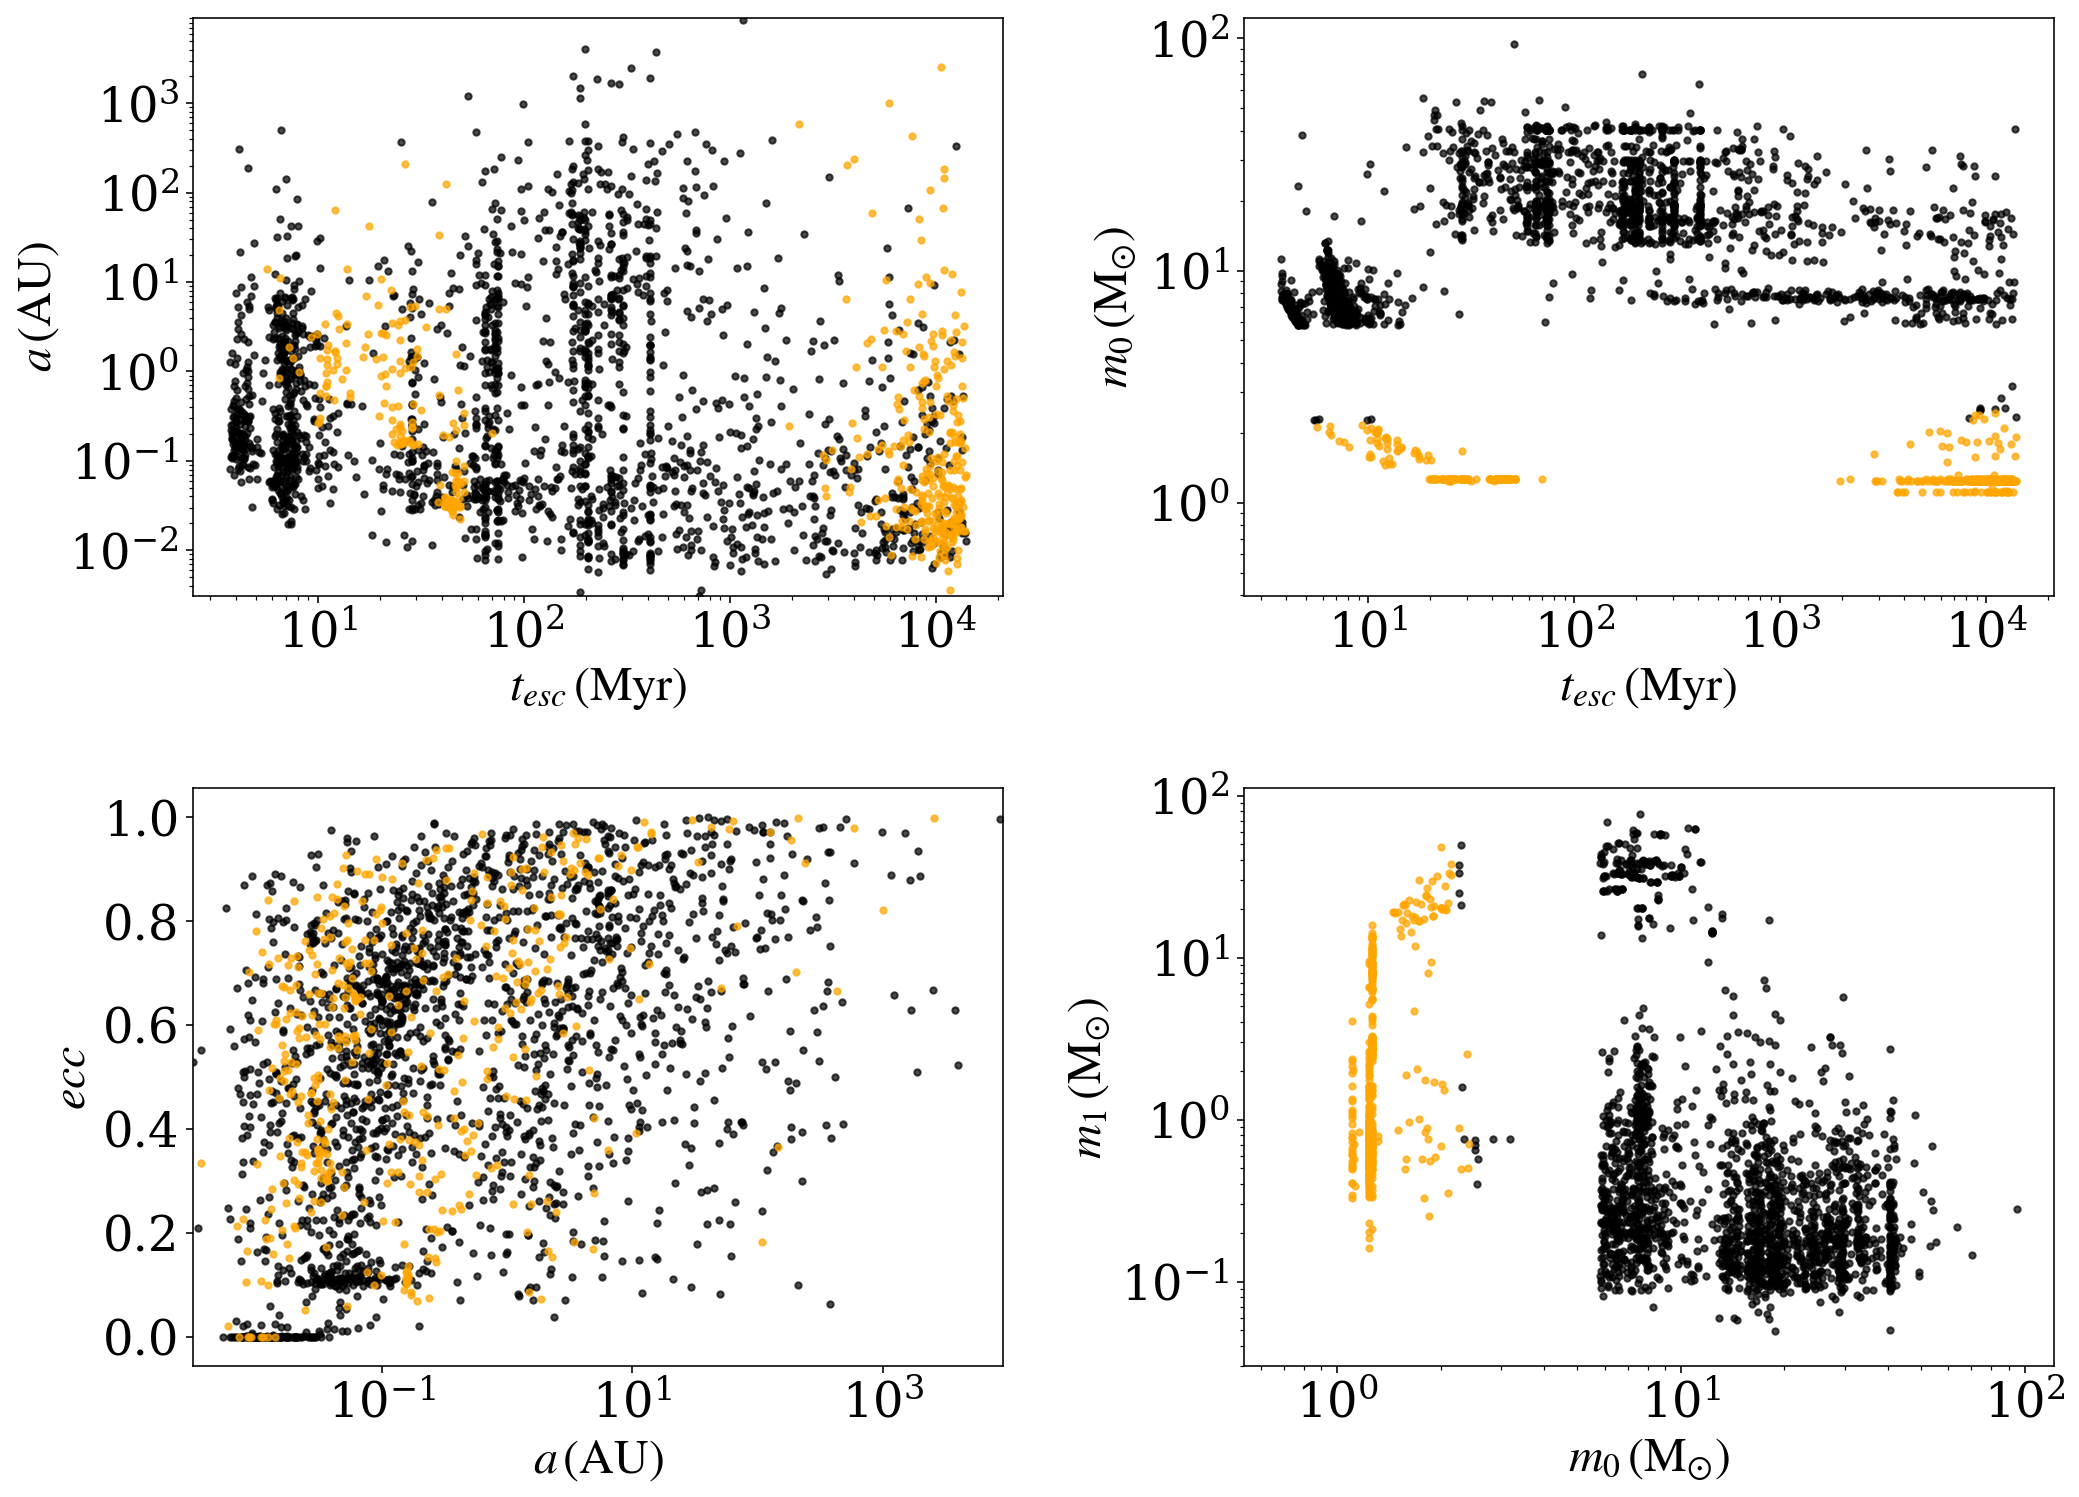

In [7]:
tesc = [[],[]]; m0 = [[],[]]; m1 = [[],[]]
sma = [[],[]]; ecc = [[],[]]
n=0
for ii in range(len(alldir)):
    if not os.path.isfile(alldir[ii]+'initial.conv.sh'):
        print(alldir[ii])
        continue
        
    n+=1
    #print(alldir[ii])
    t_conv = dyn.conv('t', alldir[ii]+'initial.conv.sh')
    with open(alldir[ii]+'initial.esc.dat', 'r') as fesc:
        next(fesc)
        for line in fesc:
            data = line.split()
            if int(data[14])==1:
                if int(data[22])==14 and 0<=int(data[23])<=1:
                    tesc[0].append(t_conv*float(data[1]))
                    m0[0].append(float(data[15]))
                    m1[0].append(float(data[16]))
                    sma[0].append(float(data[19]))
                    ecc[0].append(float(data[20]))
                    
                if int(data[23])==14 and 0<=int(data[22])<=1:
                    tesc[0].append(t_conv*float(data[1]))
                    m0[0].append(float(data[16]))
                    m1[0].append(float(data[15]))
                    sma[0].append(float(data[19]))
                    ecc[0].append(float(data[20]))
                    
                if int(data[22])==13 and 0<=int(data[23])<=1:
                    tesc[1].append(t_conv*float(data[1]))
                    m0[1].append(float(data[15]))
                    m1[1].append(float(data[16]))
                    sma[1].append(float(data[19]))
                    ecc[1].append(float(data[20]))
                    
                if int(data[23])==13 and 0<=int(data[22])<=1:
                    tesc[1].append(t_conv*float(data[1]))
                    m0[1].append(float(data[16]))
                    m1[1].append(float(data[15]))
                    sma[1].append(float(data[19]))
                    ecc[1].append(float(data[20]))
            
print(n)
print(len(m0[0]), len(m0[1]))
print(np.min(sma[0]),np.min(sma[1]))

ntarget = [0,0]
for kk in range(2):
    for yy in range(len(m0[kk])):
        if 0.5<sma[kk][yy]<2 and 0.3<ecc[kk][yy]<0.6:
            if kk==0 and 5<m0[kk][yy]<20 and 0.5<m1[kk][yy]<3:
                    ntarget[0]+=1
                    print(m0[kk][yy], m1[kk][yy], sma[kk][yy], ecc[kk][yy], tesc[kk][yy])
            if kk==1 and 0.5<m1[kk][yy]<3:
                ntarget[1]+=1
                print(m0[kk][yy], m1[kk][yy], sma[kk][yy], ecc[kk][yy], tesc[kk][yy])
            
    
print(ntarget)
    
cs = ['k', 'orange']
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15, 11))
for xx in range(2):
    axs[0][0].scatter(tesc[xx], sma[xx], color = cs[xx], alpha=0.7, s=10)
    axs[0][1].scatter(tesc[xx], m0[xx], color = cs[xx], alpha=0.7, s=10)
    axs[1][0].scatter(sma[xx], ecc[xx], color = cs[xx], alpha=0.7, s=10)
    axs[1][1].scatter(m0[xx], m1[xx], color = cs[xx], alpha=0.7, s=10)
    
axs[0][0].set_xscale('log')
axs[0][0].set_yscale('log')
axs[0][0].set_xlabel(r'$t_{esc}\,(\rm{Myr})$')
axs[0][0].set_ylabel(r'$a\,(\rm{AU})$')
axs[0][0].set_ylim(ymin = min(np.min(sma[0]),np.min(sma[1])))

axs[0][1].set_xscale('log')
axs[0][1].set_yscale('log')
axs[0][1].set_xlabel(r'$t_{esc}\,(\rm{Myr})$')
axs[0][1].set_ylabel(r'$m_0\,(\rm{M_{\odot}})$')

axs[1][0].set_xscale('log')
axs[1][0].set_xlabel(r'$a\,(\rm{AU})$')
axs[1][0].set_xlim(xmin = min(np.min(sma[0]),np.min(sma[1])))
axs[1][0].set_ylabel(r'$ecc$')

axs[1][1].set_xscale('log')
axs[1][1].set_yscale('log')
axs[1][1].set_xlabel(r'$m_0\,(\rm{M_{\odot}})$')
axs[1][1].set_ylabel(r'$m_1\,(\rm{M_{\odot}})$')

fig.tight_layout()

In [5]:
tesc = [[],[]]; m0 = [[],[]]; m1 = [[],[]]
sma = [[],[]]; ecc = [[],[]]

path = '/projects/b1095/syr904/cmc/CMC-COSMIC/ejBHMS_lowmass/CMC-COSMIC/CMC/runs/n1e5_rv2_z0.02_fb100_iso/'
t_conv = dyn.conv('t', path+'initial.conv.sh')

##Escape file
with open(path+'initial.esc.dat', 'r') as fesc:
    next(fesc)
    for line in fesc:
        data = line.split()
        if int(data[14])==1:
            if int(data[22])==14 and 0<=int(data[23])<=1:
                tesc[0].append(t_conv*float(data[1]))
                m0[0].append(float(data[15]))
                m1[0].append(float(data[16]))
                sma[0].append(float(data[19]))
                ecc[0].append(float(data[20]))
                
            if int(data[23])==14 and 0<=int(data[22])<=1:
                tesc[0].append(t_conv*float(data[1]))
                m0[0].append(float(data[16]))
                m1[0].append(float(data[15]))
                sma[0].append(float(data[19]))
                ecc[0].append(float(data[20]))
                
            if int(data[22])==13 and 0<=int(data[23])<=1:
                tesc[1].append(t_conv*float(data[1]))
                m0[1].append(float(data[15]))
                m1[1].append(float(data[16]))
                sma[1].append(float(data[19]))
                ecc[1].append(float(data[20]))
                
            if int(data[23])==13 and 0<=int(data[22])<=1:
                tesc[1].append(t_conv*float(data[1]))
                m0[1].append(float(data[16]))
                m1[1].append(float(data[15]))
                sma[1].append(float(data[19]))
                ecc[1].append(float(data[20]))
            
print(len(m0[0]), len(m0[1]))
#print(np.min(sma[0]),np.min(sma[1]))

ntarget = [0,0]
for kk in range(2):
    for yy in range(len(m0[kk])):
        if 0.4<sma[kk][yy]<3 and 0.2<ecc[kk][yy]<0.7:
            if kk==0 and 5<m0[kk][yy]<20 and 0.5<m1[kk][yy]<3:
                    ntarget[0]+=1
                    print(m0[kk][yy], m1[kk][yy], sma[kk][yy], ecc[kk][yy], tesc[kk][yy])
            if kk==1 and 0.5<m1[kk][yy]<3:
                ntarget[1]+=1
                print(m0[kk][yy], m1[kk][yy], sma[kk][yy], ecc[kk][yy], tesc[kk][yy])
                
        
        print(m0[kk][yy], m1[kk][yy], sma[kk][yy], ecc[kk][yy], tesc[kk][yy])
            
print(ntarget)


#########################################################################
##Snap file
snap_h5 = 'initial.snapshots.h5'
snapkeys = np.genfromtxt(path+'snap_keys.txt', dtype=str)
snap_no = snapkeys[:,0]; snap_time = snapkeys[:,1]
snap = cmct.Snapshot(fname=path+snap_h5, snapshot_name='/'+snap_no[-1]+'(t='+snap_time[-1]+')', 
                     conv=path+'initial.conv.sh', 
                     z=0.02)

bflag = snap.data['binflag']
sma = np.array(snap.data['a_AU'][bflag==1]); ecc = np.array(snap.data['e'][bflag==1])
m0 = np.array(snap.data['m0_MSUN'][bflag==1]); m1=np.array(snap.data['m1_MSUN'][bflag==1])
k0 = np.array(snap.data['bin_startype0'][bflag==1]); k1 = np.array(snap.data['bin_startype1'][bflag==1])
print(np.where(k0==14))

m0_inc = [[],[]]; m1_inc = [[],[]]
sma_inc = [[],[]]; ecc_inc = [[],[]]
for xx in range(len(k0)):
    if k0[xx]==14 and 0<=k1[xx]<=1:
        m0_inc[0].append(m0[xx])
        m1_inc[0].append(m1[xx])
        sma_inc[0].append(sma[xx])
        ecc_inc[0].append(ecc[xx])
        
    if k1[xx]==14 and 0<=k0[xx]<=1:
        m0_inc[0].append(m1[xx])
        m1_inc[0].append(m0[xx])
        sma_inc[0].append(sma[xx])
        ecc_inc[0].append(ecc[xx])
        
    if k0[xx]==13 and 0<=k1[xx]<=1:
        m0_inc[1].append(m0[xx])
        m1_inc[1].append(m1[xx])
        sma_inc[1].append(sma[xx])
        ecc_inc[1].append(ecc[xx])
            
    if k1[xx]==13 and 0<=k0[xx]<=1:
        m0_inc[1].append(m1[xx])
        m1_inc[1].append(m0[xx])
        sma_inc[1].append(sma[xx])
        ecc_inc[1].append(ecc[xx])
            
print(len(m0_inc[0]), len(m0_inc[1]))
#print(np.min(sma[0]),np.min(sma[1]))

ntarget = [0,0]
for kk in range(2):
    for yy in range(len(m0_inc[kk])):
        if 0.4<sma_inc[kk][yy]<3 and 0.2<ecc_inc[kk][yy]<0.7:
            if kk==0 and 5<m0_inc[kk][yy]<20 and 0.5<m1_inc[kk][yy]<3:
                    ntarget[0]+=1
                    print(m0_inc[kk][yy], m1_inc[kk][yy], 
                          sma_inc[kk][yy], ecc_inc[kk][yy])
            if kk==1 and 0.5<m1_inc[kk][yy]<3:
                ntarget[1]+=1
                print(m0_inc[kk][yy], m1_inc[kk][yy], 
                      sma_inc[kk][yy], ecc_inc[kk][yy])
                
        
        print(m0_inc[kk][yy], m1_inc[kk][yy], sma_inc[kk][yy], ecc_inc[kk][yy])
            
print(ntarget)


5 19
10.06008 75.042465 12.080399 0.57069038 4.08224415996
7.3549499 54.687562 1.8604057 0.63661918 4.245649565280001
6.7253431 64.972419 0.79277633 0.24484956 4.4696587801200005
6.7657825 42.154422 11.235363 0.91222441 4.72970196662
5.7465262 53.369098 0.74756609 0.081401227 4.90558059992
1.8197588 39.499311 0.78054019 0.3292911 6.30077254934
1.6593175 19.944937 3.4125647 0.90492423 7.1108895930200005
1.5248675 34.696663 13.697109 0.53188066 8.38234422102
1.5222396 28.928127 30.172257 0.89709382 8.38234422102
1.4379325 24.990925 1.0115744 0.58641099 8.93229449092
1.4142995 27.596795 0.93903924 0.58044957 9.33604787454
1.4027227 22.868233 51.211597 0.98014445 9.39422598078
1.3452789 29.011482 3.0699388 0.85001051 9.73119901804
1.2924055 24.232556 0.80739684 0.25261074 11.09649354852
1.3034728 23.999548 1.3262026 0.79002057 11.09649354852
1.2183453 13.821252 0.23217926 0.75306437 12.393651705540002
1.2607822 18.580362 1.285767 0.8771532 14.50867251688
1.2607821 5.007227 0.12400306 0.166